In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
df = pd.read_csv(r"Dataset/energydata_complete.csv")
df.head()
df.info()
print("Shape:", df.shape)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
df_processed = df.copy()


In [5]:
# This cell converts raw timestamps into meaningful numerical features that a machine learning model can understand.
# Example:  "2016-01-11 17:00:00" -> hour=17, day=11, month=1, weekday=0 (Monday), is_weekend=0 (False)

df_processed['date'] = pd.to_datetime(df_processed['date'])

df_processed['hour'] = df_processed['date'].dt.hour
df_processed['day'] = df_processed['date'].dt.day
df_processed['month'] = df_processed['date'].dt.month
df_processed['weekday'] = df_processed['date'].dt.weekday
df_processed['is_weekend'] = df_processed['weekday'].isin([5, 6]).astype(int)



In [6]:
# Dropping Unnecessary Columns
df_processed = df_processed.drop(
    columns=['date', 'rv1', 'rv2'],
    errors='ignore'
)

# 'date' is dropped as we have extracted useful features from it.
# 'rv1' and 'rv2' are random variables that do not contribute to the prediction.
df_processed.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,hour,day,month,weekday,is_weekend
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.3,17,11,1,0,0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.2,17,11,1,0,0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,55.333333,5.1,17,11,1,0,0
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,733.8,92.0,6.000000,51.500000,5.0,17,11,1,0,0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,47.666667,4.9,17,11,1,0,0


In [7]:
df_processed.columns


Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'hour', 'day', 'month', 'weekday', 'is_weekend'],
      dtype='object')

In [9]:
X = df_processed.drop(columns=['Appliances'])
y = df_processed['Appliances']
print(X.columns)
print(y.name)


Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'hour',
       'day', 'month', 'weekday', 'is_weekend'],
      dtype='object')
Appliances


In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled).describe()



,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,...,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04,1.578800e+04
mean,3.960461e-17,2.554047e-15,-2.777273e-15,-8.145949e-17,-1.620189e-15,-8.872783e-16,5.319619e-16,1.386836e-15,6.143215e-16,1.644717e-15,...,1.153754e-14,9.451100e-16,7.200838e-18,3.537412e-16,-8.235959e-17,9.361090e-17,1.206140e-16,1.291650e-16,2.340273e-17,1.800210e-18
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,...,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-4.782899e-01,-3.043586e+00,-3.346687e+00,-1.932905e+00,-4.908246e+00,-2.525005e+00,-3.229590e+00,-2.805425e+00,-2.630499e+00,-2.306354e+00,...,-3.557950e+00,-3.747756e+00,-1.654716e+00,-3.159502e+00,-2.470549e+00,-1.659028e+00,-1.786855e+00,-1.565296e+00,-1.503680e+00,-6.220776e-01
25%,-4.782899e-01,-5.670956e-01,-7.246024e-01,-6.929337e-01,-6.216743e-01,-7.367694e-01,-7.235114e-01,-6.439452e-01,-7.986553e-01,-7.070053e-01,...,-6.260042e-01,-6.370877e-01,-8.336762e-01,-7.897077e-01,-6.777762e-01,-9.375802e-01,-8.388576e-01,-8.207076e-01,-1.000445e+00,-6.220776e-01
50%,-4.782899e-01,-5.509984e-02,-1.524232e-01,-1.571811e-01,1.750097e-02,-8.423765e-02,-2.120248e-01,-1.076381e-01,-1.349104e-01,-1.126526e-01,...,7.702968e-02,2.804474e-01,-1.494760e-01,1.412830e-01,-8.282936e-02,-7.184316e-02,-9.359587e-03,-7.611896e-02,6.024282e-03,-6.220776e-01
75%,-4.782899e-01,5.662071e-01,7.059509e-01,5.257897e-01,7.033852e-01,5.085202e-01,7.739735e-01,6.074380e-01,7.267259e-01,5.584706e-01,...,7.331570e-01,7.951622e-01,6.031442e-01,1.412830e-01,6.707700e-01,9.381834e-01,8.201385e-01,6.684697e-01,1.012494e+00,1.607516e+00
max,8.312444e+00,2.840190e+00,4.335719e+00,4.330696e+00,3.524770e+00,3.470317e+00,3.363246e+00,2.606401e+00,2.781871e+00,3.348101e+00,...,2.274293e+00,1.354635e+00,4.092565e+00,2.341807e+00,2.764983e+00,1.659631e+00,1.768136e+00,1.413058e+00,1.515729e+00,1.607516e+00


In [13]:
# Training a Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)


In [14]:
def evaluate(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

lr_metrics = evaluate(y_test, y_pred_lr, "Linear Regression")
lr_metrics


{'Model': 'Linear Regression',
 'MAE': 52.5652081036519,
 'RMSE': np.float64(91.10079931631996),
 'R2': 0.17065253448160445}

In [15]:
# Training a random forest regressor
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [ ]:
# Evaluating Random Forest Model
rf_metrics = evaluate(y_test, y_pred_rf, "Random Forest")
rf_metrics



{'Model': 'Random Forest',
 'MAE': 30.75912085127945,
 'RMSE': np.float64(65.95694425678718),
 'R2': 0.56527641701252}

In [ ]:
# MAE — Mean Absolute Error
# RMSE — Root Mean Squared Error
# R² — Explained variance
results = pd.DataFrame([lr_metrics, rf_metrics])
results


,Model,MAE,RMSE,R2
0,Linear Regression,52.565208,91.100799,0.170653
1,Random Forest,30.759121,65.956944,0.565276


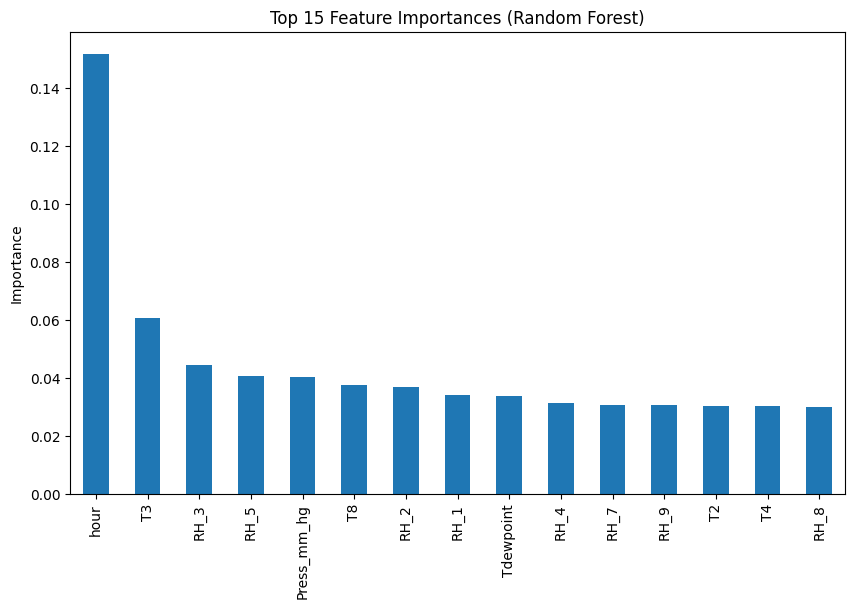

In [ ]:
# Feature importance tells us which inputs the model relied on the most to make predictions.
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.ylabel("Importance")
plt.show()


In [19]:
EMISSION_FACTOR = 0.82  # kg CO2 per kWh (assumed standard grid factor)

energy_kwh = y_pred_rf / 1000
co2_emissions = energy_kwh * EMISSION_FACTOR

co2_emissions[:5]


array([0.043993, 0.092783, 0.037269, 0.050594, 0.059081])

In [20]:
results_df = X_test.copy()

results_df['Actual_Energy_Wh'] = y_test.values
results_df['Predicted_Energy_Wh'] = y_pred_rf
results_df['Predicted_CO2_kg'] = co2_emissions

results_df.head()



,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Visibility,Tdewpoint,hour,day,month,weekday,is_weekend,Actual_Energy_Wh,Predicted_Energy_Wh,Predicted_CO2_kg
8980,0,20.890000,35.400000,17.760000,39.163333,20.290000,36.900000,19.760000,34.200000,18.600000,...,63.000000,0.000000,1,14,3,0,0,40,53.65,0.043993
2754,10,21.890000,53.100000,21.290000,45.360000,21.633333,49.226667,20.533333,40.966667,17.677778,...,27.000000,1.200000,20,30,1,5,1,90,113.15,0.092783
9132,0,21.390000,35.500000,17.633333,40.530000,21.666667,35.200000,20.290000,33.760000,19.600000,...,65.000000,-2.400000,3,15,3,1,0,50,45.45,0.037269
14359,0,21.390000,41.033333,23.890000,34.840000,22.033333,36.933333,22.390000,35.236000,19.633333,...,40.000000,3.716667,10,20,4,2,0,50,61.70,0.050594
8875,0,19.963333,35.126667,16.463333,40.126667,20.000000,36.400000,19.260000,34.966667,17.890000,...,48.833333,-1.450000,8,13,3,6,1,70,72.05,0.059081


In [21]:
comparison_df = X_test.copy()

comparison_df['Actual_Energy_Wh'] = y_test.values
comparison_df['Pred_LR_Wh'] = y_pred_lr
comparison_df['Pred_RF_Wh'] = y_pred_rf

comparison_df.head()


,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,Visibility,Tdewpoint,hour,day,month,weekday,is_weekend,Actual_Energy_Wh,Pred_LR_Wh,Pred_RF_Wh
8980,0,20.890000,35.400000,17.760000,39.163333,20.290000,36.900000,19.760000,34.200000,18.600000,...,63.000000,0.000000,1,14,3,0,0,40,29.793849,53.65
2754,10,21.890000,53.100000,21.290000,45.360000,21.633333,49.226667,20.533333,40.966667,17.677778,...,27.000000,1.200000,20,30,1,5,1,90,257.308128,113.15
9132,0,21.390000,35.500000,17.633333,40.530000,21.666667,35.200000,20.290000,33.760000,19.600000,...,65.000000,-2.400000,3,15,3,1,0,50,45.416266,45.45
14359,0,21.390000,41.033333,23.890000,34.840000,22.033333,36.933333,22.390000,35.236000,19.633333,...,40.000000,3.716667,10,20,4,2,0,50,112.520897,61.70
8875,0,19.963333,35.126667,16.463333,40.126667,20.000000,36.400000,19.260000,34.966667,17.890000,...,48.833333,-1.450000,8,13,3,6,1,70,41.447860,72.05


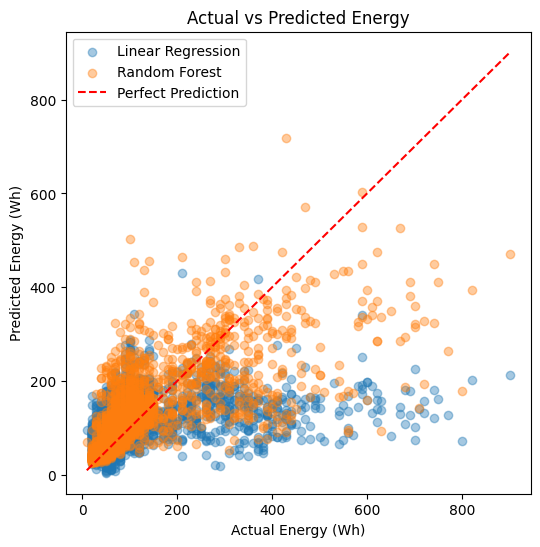

In [22]:
plt.figure(figsize=(6, 6))

plt.scatter(y_test, y_pred_lr, alpha=0.4, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.4, label="Random Forest")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', label="Perfect Prediction")

plt.xlabel("Actual Energy (Wh)")
plt.ylabel("Predicted Energy (Wh)")
plt.title("Actual vs Predicted Energy")
plt.legend()
plt.show()
